In [97]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

In [98]:
dataset_folder_path = "C:/Users/slava/Desktop/Dataset 1/Dataset 1/Colorectal Cancer/"
norm_path = dataset_folder_path + "NORM"
mus_path = dataset_folder_path + "MUS"
str_path = dataset_folder_path + "STR"

# Get all the image file names
norm_images = [f for f in os.listdir(norm_path) if f.endswith(('.tif', '.jpeg'))]
mus_images = [f for f in os.listdir(mus_path) if f.endswith(('.tif', '.jpeg'))]
str_images = [f for f in os.listdir(str_path) if f.endswith(('.tif', '.jpeg'))]

print('Number of MUS images: ' + str(len(mus_images)))
print('Number of NORM images: ' + str(len(norm_images)))
print('Number of STR images: ' + str(len(str_images)))

print(norm_images[0])

Number of MUS images: 2000
Number of NORM images: 2000
Number of STR images: 2000
NORM-AAAKGLVQ.tif


In [99]:
# Convert all the images files into numpy arrays of pixel values
norm_images = [plt.imread(os.path.join(norm_path, f)) for f in norm_images]
mus_images = [plt.imread(os.path.join(mus_path, f)) for f in mus_images]
str_images = [plt.imread(os.path.join(str_path, f)) for f in str_images]


print(norm_images[0])
print(norm_images[0].shape)

[[[203 175 212]
  [147 110 173]
  [105  66 130]
  ...
  [202 176 209]
  [184 153 196]
  [179 146 189]]

 [[213 175 211]
  [221 198 231]
  [192 162 210]
  ...
  [213 191 220]
  [202 179 216]
  [190 156 202]]

 [[208 179 207]
  [217 187 215]
  [215 181 222]
  ...
  [229 209 226]
  [233 214 233]
  [225 211 230]]

 ...

 [[247 212 234]
  [254 226 239]
  [244 216 230]
  ...
  [171 124 172]
  [150 100 153]
  [158 108 160]]

 [[216 161 199]
  [216 161 199]
  [200 142 184]
  ...
  [171 116 166]
  [159 105 158]
  [184 130 176]]

 [[175 110 163]
  [177 113 164]
  [167 105 157]
  ...
  [161 100 150]
  [156  96 150]
  [196 141 185]]]
(224, 224, 3)


Here is the first unedited picture from the NORM dataset:


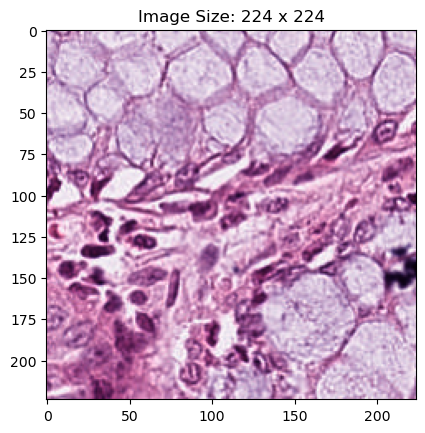

In [100]:
print('Here is the first unedited picture from the NORM dataset:')

def print_img(img):
    plt.imshow(img)
    plt.title(f"Image Size: {img.shape[1]} x {img.shape[0]}")
    plt.show()

print_img(norm_images[0])

In [101]:
min_pixel_value = np.min(norm_images[0])
max_pixel_value = np.max(norm_images[0])

print(f"Min Pixel Value: {min_pixel_value}")
print(f"Max Pixel Value: {max_pixel_value}")

Min Pixel Value: 1
Max Pixel Value: 255


In [102]:
print('Normalizing the image pixel values to be between [0,1], instead of [1,255]')

for i in range(0, len(norm_images)):
    norm_images[i] = norm_images[i].astype(float) / 255.0

for i in range(0, len(mus_images)):
    mus_images[i] = mus_images[i].astype(float) / 255.0

for i in range(0, len(str_images)):
    str_images[i] = str_images[i].astype(float) / 255.0

# just making sure the pixel values are indeed scaled down
min_pixel_value = np.min(norm_images[0])
max_pixel_value = np.max(norm_images[0])

print(f"Min Pixel Value: {min_pixel_value}")
print(f"Max Pixel Value: {max_pixel_value}")

Normalizing the image pixel values to be between [0,1], instead of [1,255]
Min Pixel Value: 0.00392156862745098
Max Pixel Value: 1.0


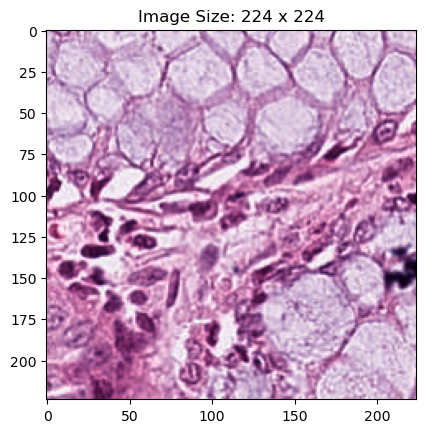

In [103]:
# even though the img pixels are scaled down, the picture still looks the same 
# I think it's matplotlib that adapts it to look the same
print_img(norm_images[0])

In [104]:
print('At this point, the image pixel values are normalized')
print('I am going to now combine all this code into a funtion that can be easily reused for other datasets')

At this point, the image pixel values are normalized
I am going to now combine all this code into a funtion that can be easily reused for other datasets


[[[0.83921569 0.58823529 0.77647059]
  [0.84705882 0.61176471 0.8       ]
  [0.8        0.55294118 0.75294118]
  ...
  [0.75294118 0.32156863 0.53333333]
  [0.79215686 0.37254902 0.58039216]
  [0.83921569 0.41176471 0.61960784]]

 [[0.79215686 0.54901961 0.74901961]
  [0.82352941 0.58431373 0.77647059]
  [0.80784314 0.56470588 0.76078431]
  ...
  [0.71764706 0.32156863 0.55686275]
  [0.74117647 0.35686275 0.58431373]
  [0.78039216 0.38431373 0.61176471]]

 [[0.78039216 0.54117647 0.74117647]
  [0.79215686 0.54901961 0.74117647]
  [0.79607843 0.55294118 0.74117647]
  ...
  [0.70196078 0.32941176 0.58039216]
  [0.71764706 0.35294118 0.60392157]
  [0.75686275 0.36862745 0.61176471]]

 ...

 [[0.7372549  0.38431373 0.6       ]
  [0.72156863 0.37254902 0.59215686]
  [0.73333333 0.38431373 0.60392157]
  ...
  [0.74901961 0.50588235 0.7254902 ]
  [0.77647059 0.5372549  0.75294118]
  [0.78431373 0.55686275 0.75686275]]

 [[0.79607843 0.43921569 0.64705882]
  [0.75686275 0.39607843 0.61568627]


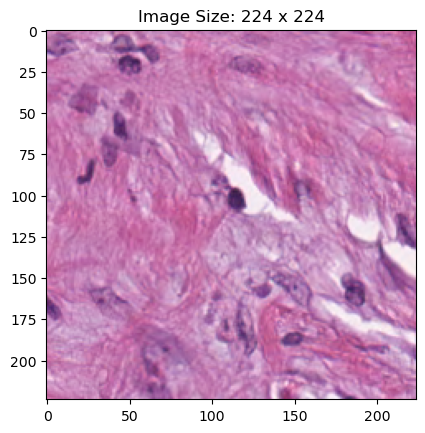

STR
(4800, 224, 224, 3)
(1200, 224, 224, 3)
(4800,)
(1200,)


In [107]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# change the path of the folder to how it is stored on your pc
dataset_folder_path = "C:/Users/slava/Desktop/Dataset 1/Dataset 1/Colorectal Cancer/"
norm_path = dataset_folder_path + "NORM" # these are the specific subfolders of the above one
mus_path = dataset_folder_path + "MUS"
str_path = dataset_folder_path + "STR"

# for this dataset, each subfolder consists of images of the same label
labels = {'NORM': norm_path, 'MUS': mus_path, 'STR': str_path}

# empty arrays that will hold our data
X = []
y = []


for label, directory in labels.items():
    files = os.listdir(directory)
    for file in files:
        if file.endswith(('.tif', '.jpeg')):
            # read the image into a numpy array
            the_image = plt.imread(os.path.join(directory, file))
            
            # resize (for dataset 2 & 3)
            # the_image = the_image.resize((224, 224))
            
            # normalize pixel values (from [1,255] to [0,1])
            the_image = the_image.astype(float) / 255.0
            
            X.append(the_image) # add the image
            y.append(label) # add the image's corresponding label


            
# ensuring it's numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data and labels
shuffle_indices = np.arange(len(X))
np.random.shuffle(shuffle_indices)

X = X[shuffle_indices]
y = y[shuffle_indices] # at this point the data is shuffled


from sklearn.model_selection import train_test_split

# Split into training and testing sets
# you can adjust test_size. But in this case, test set is 20% of original dataset, train is 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# ^ at this point, you have the data you need to start training the model



#################### just to make sure everything still is fine (you can delete this, its just tests)
print(X_train[0])
print(y_train[0])

print('For pixel values below min should be close to 0 and max close to 1, otherwise normalization went wrong:')
min_pixel_value = np.min(norm_images[0])
max_pixel_value = np.max(norm_images[0])

print(f"Min Pixel Value: {min_pixel_value}")
print(f"Max Pixel Value: {max_pixel_value}")

# printing an image and its label
print_img(X_train[0])
print(y_train[0])

# to make sure shapes are correct
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)